In [5]:
import time
import pickle
import numpy as np

In [6]:
with open('../step_4_start_2hours.pkl', 'rb') as file:
    try:
        MIMICtable = pickle.load(file)
    except ModuleNotFoundError as e:
        print(f"ModuleNotFoundError: {e}")


In [7]:
ncv = 10  # nr of crossvalidation runs (each is 80% training / 20% test)交叉验证运行的Nr(每次为80%训练/ 20%测试)
icustayidlist = MIMICtable['icustayid']
icuuniqueids = np.unique(icustayidlist)
N = icuuniqueids.size
grp = np.floor(ncv * np.random.rand(N,
                                    1) + 1)
crossval1 = 1  # Utilizing equal to 1 and not equal to 1
crossval2 = 2  # Utilizing equal to 1 and not equal to 1
trainidx = icuuniqueids[np.where(grp > crossval2)[0]]
validationidx = icuuniqueids[np.where(grp == crossval1)[0]]
testidx = icuuniqueids[np.where(grp == crossval2)[0]]
train = np.isin(icustayidlist, trainidx)
validation = np.isin(icustayidlist, validationidx)
test = np.isin(icustayidlist, testidx)
# 保存到文件
np.save('train_2hours.npy', train)
np.save('validation_2hours.npy', validation)
np.save('test_2hours.npy', test)

In [8]:
import numpy as np

# Misalkan MIMICtable adalah DataFrame yang sudah dimuat dan memuat kolom 'icustayid'
icustayidlist = MIMICtable['icustayid']
icuuniqueids = np.unique(icustayidlist)
N = icuuniqueids.size

# Tentukan jumlah cross-validation (ncv), misalnya 10 untuk 10-fold cross-validation
ncv = 10  

# Membagi data secara acak (80% training, 20% testing)
grp = np.floor(ncv * np.random.rand(N, 1) + 1)

crossval1 = 1  # Pengguna yang digunakan untuk validasi
crossval2 = 2  # Pengguna yang digunakan untuk testing

# Membagi data ke dalam train, validation, dan test berdasarkan grup
trainidx = icuuniqueids[np.where(grp > crossval2)[0]]
validationidx = icuuniqueids[np.where(grp == crossval1)[0]]
testidx = icuuniqueids[np.where(grp == crossval2)[0]]

# Membuat array boolean untuk train, validation, dan test berdasarkan id
train = np.isin(icustayidlist, trainidx)
validation = np.isin(icustayidlist, validationidx)
test = np.isin(icustayidlist, testidx)

# Menyimpan pembagian data ke dalam file .npy untuk digunakan nanti
np.save('train_2hours.npy', train)
np.save('validation_2hours.npy', validation)
np.save('test_2hours.npy', test)

# Output untuk memverifikasi pembagian
print(f"Train samples: {np.sum(train)}")
print(f"Validation samples: {np.sum(validation)}")
print(f"Test samples: {np.sum(test)}")

Train samples: 419298
Validation samples: 53683
Test samples: 53403


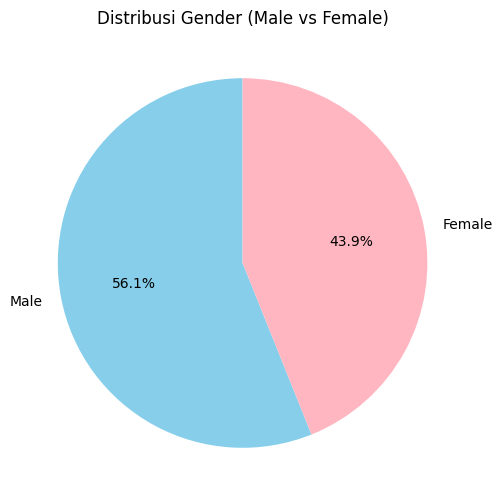

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
mimic_data = pd.read_csv('../mimictable.csv')

# Memeriksa distribusi nilai dalam kolom 'gender'
gender_distribution = mimic_data['gender'].value_counts()

# Memetakan nilai numerik ke label (asumsi: 0 = Male, 1 = Female)
gender_labels = {0.0: 'Male', 1.0: 'Female'}
gender_distribution.index = gender_distribution.index.map(gender_labels)

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_distribution,
    labels=gender_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightpink"]
)
plt.title("Distribusi Gender (Male vs Female)")
plt.show()

Dataset Shape: (278315, 59)

Column Data Types:
 bloc                                          float64
icustayid                                     float64
charttime                                     float64
gender                                        float64
age                                           float64
elixhauser                                    float64
re_admission                                  float64
died_in_hosp                                  float64
died_within_48h_of_out_time                   float64
mortality_90d                                 float64
delay_end_of_record_and_discharge_or_death    float64
Weight_kg                                     float64
GCS                                           float64
HR                                            float64
SysBP                                         float64
MeanBP                                        float64
DiaBP                                         float64
RR                               

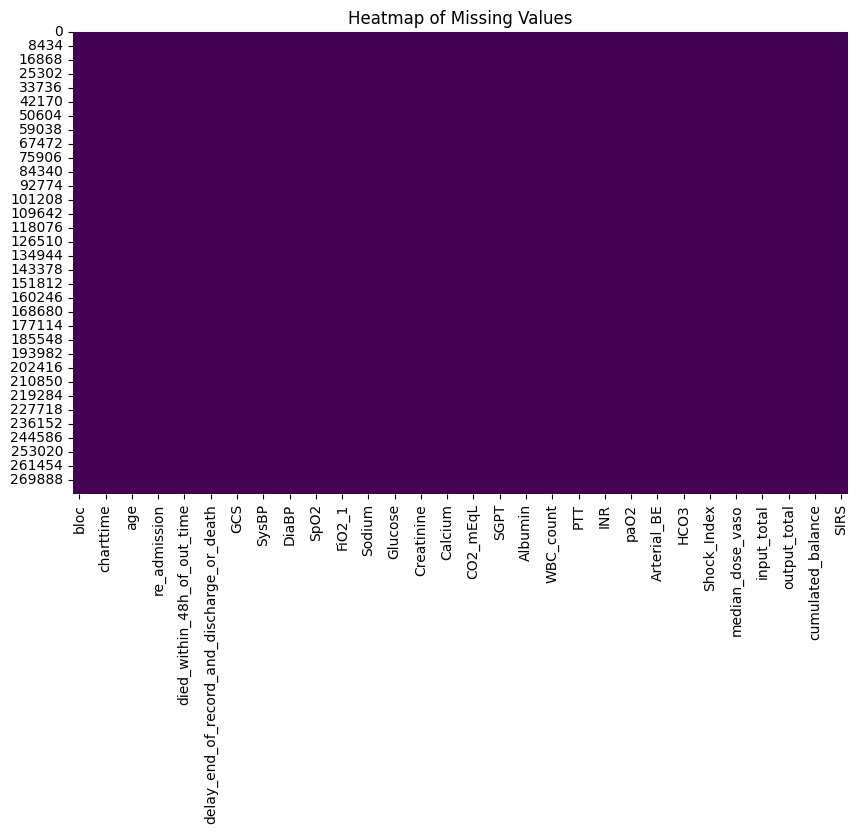

ValueError: Layout of 3x3 must be larger than required size 59

<Figure size 1500x1000 with 0 Axes>

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('../mimictable.csv')

# Display basic information about the dataset


def display_basic_info(data):
    print("Dataset Shape:", data.shape)
    print("\nColumn Data Types:\n", data.dtypes)
    print("\nMissing Values Per Column:\n", data.isnull().sum())
    print("\nSample Rows:\n", data.head())

# Summary statistics for numerical columns


def numerical_summary(data):
    print("\nNumerical Summary:\n", data.describe())

# Check for missing values


def missing_values_heatmap(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Heatmap of Missing Values')
    plt.show()

# Visualize distributions of numerical variables


def plot_distributions(data):
    num_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[num_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
    plt.tight_layout()
    plt.show()

# Visualize categorical columns


def plot_categorical(data):
    cat_columns = data.select_dtypes(include=['object']).columns
    for col in cat_columns:
        plt.figure(figsize=(8, 4))
        data[col].value_counts().head(10).plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

# Correlation heatmap for numerical variables


def correlation_heatmap(data):
    plt.figure(figsize=(12, 8))
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()


# Execute EDA steps
if __name__ == "__main__":
    display_basic_info(data)
    numerical_summary(data)
    missing_values_heatmap(data)
    plot_distributions(data)
    plot_categorical(data)
    correlation_heatmap(data)